In [616]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [617]:
data = pd.read_csv("Data/colon_cancer.csv", sep=";")

In [618]:
data.head(5)
# data.info()
# data.describe()
# data['tissue_status'].value_counts()

,id_sample,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal


In [619]:
selected_features = data[["CTSS", "tissue_status"]]

<Figure size 800x500 with 0 Axes>

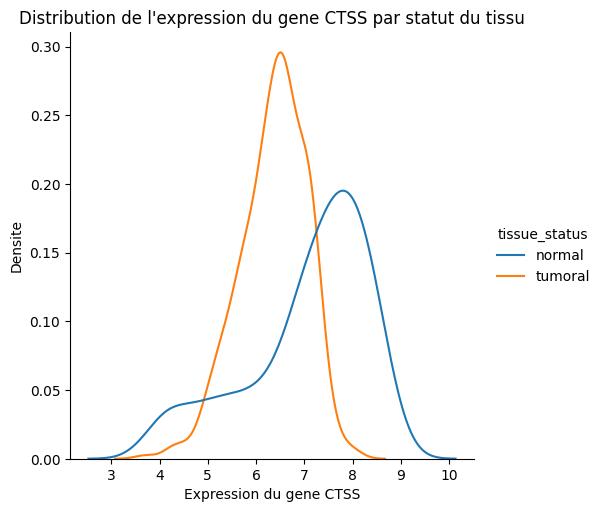

In [620]:
plt.figure(figsize=(8, 5))
sns.displot(data=selected_features, x=data["CTSS"], hue=data["tissue_status"], kind='kde')
plt.xlabel(f"Expression du gene CTSS")
plt.ylabel('Densite')
plt.title(f"Distribution de l'expression du gene CTSS par statut du tissu")
plt.show()

In [621]:
selected_features = data[["DAO", "tissue_status"]]
x = data[["DAO"]]
y = data[["tissue_status"]]

In [622]:
x.head(5)
y.head(5)

,tissue_status
0,normal
1,normal
2,normal
3,normal
4,normal


In [623]:
from sklearn.model_selection import train_test_split

In [624]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

In [625]:
X_train.head(5)

,DAO
271,7.848573
644,5.099066
172,8.419182
412,2.783990
768,4.985339


In [626]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(
    max_depth=5,                # Limit tree depth
    min_samples_split=20,       # Minimum samples to split a node
    min_samples_leaf=10,        # Minimum samples in a leaf
    max_leaf_nodes=30,          # Maximum number of leaf nodes
    random_state=42
)

In [627]:
model_dt.fit(X_train, y_train)
y_tets_pred = model_dt.predict(X_test)

In [628]:
# New DAO gene expression values to classify
new_features = [
    8.465133, 0.093537924242426, 2.5125195,
    7.589205545454546, 4.2617905, 5.7888797
]

new_features_reshaped = np.array(new_features).reshape(-1, 1)
new_features_reshaped = pd.DataFrame(new_features_reshaped, columns=["DAO"])
new_pred = model_dt.predict(new_features_reshaped)

print("Classifications of Give data: ", new_pred)

Classifications of Give data:  ['normal' 'tumoral' 'tumoral' 'normal' 'tumoral' 'tumoral']


In [629]:
# Evaluer le modèle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

classification_report(y_test, y_tets_pred)
accuracy_score(y_test, y_tets_pred)
confusion_matrix(y_test, y_tets_pred)

array([[153,   8],
       [ 14, 147]])

In [630]:
# Cross-validation: Evaluer la capacité de généralisation du modèle
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_dt, x, y.values.ravel(), cv=5)
cv_scores
cv_scores.mean()

np.float64(0.9403027950310558)

In [631]:
import joblib

joblib.dump(model_dt, "cc_model.pkl")

['cc_model.pkl']

In [632]:
imported_model = joblib.load("cc_model.pkl")

In [633]:
classify = imported_model.predict(new_features_reshaped)
print("Classifications of New given data: ", classify)

Classifications of New given data:  ['normal' 'tumoral' 'tumoral' 'normal' 'tumoral' 'tumoral']
